<img src="../figuras/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<tr>
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
El arte de medir I
</td>
</tr>
</table>

$ \renewcommand{\bra}[1]{\langle #1|} $
$ \renewcommand{\ket}[1]{|#1\rangle} $
$ \renewcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \renewcommand{\i}{{\color{blue} i}} $ 
$ \renewcommand{\tr}{{\rm tr}} $
$ \renewcommand{\Hil}{{\mathcal H}} $
$ \renewcommand{\boldn}{{\bf n}} $
$ \renewcommand{\bn}{{\bf n}} $
$ \renewcommand{\bsig}{\boldsymbol{\sigma}} $

In [3]:
import sys
sys.path.append('../')

import macro_tQ as tQ

import numpy as np
import scipy.linalg as la

from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex

# Medidas de 1 cúbit

## Medidas en la base computacional

El **circuito de medida estándar** se representa en la forma siguiente
<br>
<br>

<figure><center>
<img src="images/cubit_meter_zbasis.png" align=center width='50%'/>
</center></figure>
<br>

Por defecto, se trata de una *medida proyectiva* asociada al operador observable $Z$. Es decir, proyecta a la base $\ket{a} = \ket{0},\ket{1}$  de autoestados de $Z$

$$
Z\ket{0} = +\ket{0}~~~~,~~~~~ Z\ket{1} = -\ket{1}
$$ 

Podemos abreviar de forma  conjunta, con $~a=0,1$ 

$$
Z\ket{a} = (-1)^a\ket{a}
$$ 



En general, el estado es destruido en la medida, por lo que se suele omitir el hilo cuántico a su salida
<br>
<br>
<br>
    
<figure><center>
<img src="images/cubit_meter1.png" align=center width='30%'/>
</center></figure>
<br>



Se trata de una *medida proyectiva* a asociada al observable $Z = \sigma_z $. 
<br>

$$
Z\ket{0} = +\ket{0}~~~~,~~~~~ Z\ket{1} = -\ket{1}
$$ 


Podemos unificar ambos resultados como: $~Z\ket{a} = (-1)^a\ket{a}$, 
con  $a=\{0,1\}$.

## Probabilidades de medida

Una repetición de medidas del estado $\ket{\psi} = c_0\ket{0} + c_1\ket{1}$ da acceso estadístico a las *amplitudes de probabilidad* 

$$
p(0) = \frac{n_{0}}{N} = |c_0|^2 = |\braket{0}{\psi}|^2~~~~~~~~~~~~~~~~ p(1) = \frac{n_{1}}{N}=|c_1|^2 =  |\braket{1}{\psi}|^2 \, .
$$

Este procedimiento de reconstrucción es la base de la **tomografía cuántica**.

Definamos un vector aleatorio

In [4]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex  

theta = 1.9
phi   = 0.8

' inicialicemos un estado cuántico'
psi_ket = np.array([np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]).reshape(2,1)
array_to_latex(psi_ket,prefix= '\ket{\psi} = ')

display(Statevector(psi_ket).draw('latex'))
#display(Statevector(psi_ket).draw('Bloch'))

<IPython.core.display.Latex object>

Las probabilidades de obtener '0' y '1' son los cuadrados de las amplitudes en valor absoluto

In [5]:
p0 = np.abs(psi_ket[0])**2
p1 = np.abs(psi_ket[1])**2

print('p(0)=', np.round(p0,5),', p(1)=', np.round(p1,5))

p(0)= [0.33836] , p(1)= [0.66164]


Vamos a recuperarlas *experimentalmente* simulando un circuito. Primero obtenemos el diccionario de cuentas obtenidas después de ejecutar el circuito un número de veces

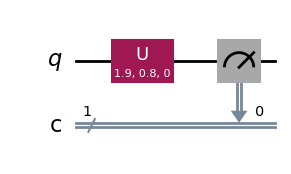

In [6]:
nshots = 10000

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
simulator = AerSimulator()

'generamos un circuito en el que inicializamos el estado psi'
qc_psi_Qiskit = QuantumCircuit(1,1)
qc_psi_Qiskit.u(theta,phi,0,0)
qc_psi_Qiskit.measure(0,0)
display(qc_psi_Qiskit.draw('mpl'))

'ejecutamos un número de veces'
counts_psi = simulator.run(qc_psi_Qiskit,shots=nshots).result().get_counts()

Visualizamos el resultado mediante un histograma

counts_psi =  {'0': 3360, '1': 6640}


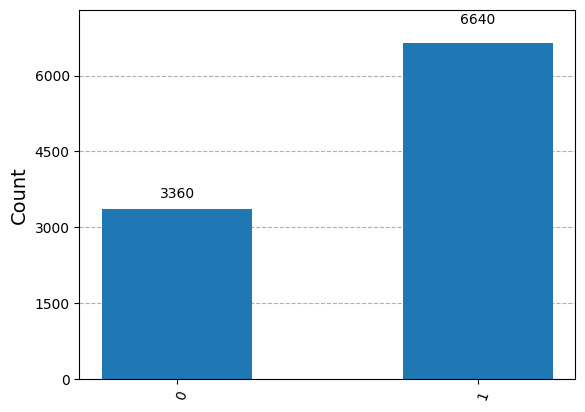

In [7]:
from qiskit.visualization import plot_histogram
print('counts_psi = ',counts_psi)
plot_histogram(counts_psi) # Mostramos un histograma de resultados

Ahora podemos  calcular las frecuencias relativas $n_i/N$  y compararlas con las probabilidades $p(i)$

In [8]:
p0_experiment = counts_psi['0']/nshots
p1_experiment = counts_psi['1']/nshots

print('p(0)_experiment =', p0_experiment,'  p(1)_experiment = ',p1_experiment)

p(0)_experiment = 0.336   p(1)_experiment =  0.664


## Medidas en un ordenador cuántico real



Una vez que hemos verificado que el programa 
corre bien en nuestro simulador, podemos lanzarlo a un ordenador cuántico real sin más que cambiar el *backend*.

Por el momento usaremos los ordenadores gratuitos de IBM. Para ello es necesario hacer una cuenta de usuario
en https://quantum-computing.ibm.com/ 

Go to https://quantum-computing.ibm.com/account and get API-token in the MyAccount section. Copy token and paste in the following cell in between the brackets (after uncommenting the line)

https://docs.quantum.ibm.com/guides/setup-channel

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum", token="<TOKEN>")

In [ ]:
# Save an IBM Quantum account and set it as your default account.
#QiskitRuntimeService.save_account(
#    token="<TOKEN>",
#    channel="ibm_quantum",
#    set_as_default=True,
#    # Use `overwrite=True` if you're updating your token.
#    overwrite=True,
#)

In [ ]:
from qiskit
# Load saved credentials
service = QiskitRuntimeService()

In [ ]:
# Create empty circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Get the least busy backend
backend = service.least_busy(operational=True, simulator=False)
print(backend)

from qiskit.compiler import transpile
transqc = transpile(qc,backend)
transqc.draw('mpl')

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend)
job = sampler.run([transqc])

service.jobs(backend_name=backend)

In [ ]:
job.cancel()

In [ ]:
service.jobs(backend_name=backend)

In [ ]:
print(f"job id: {job.job_id()}")
result=job.result().quasi_dists[0]
print(result)



In [ ]:
plot_histogram(counts)

## Interferencia cuántica y medidas

El resultado de tirar una moneda al aire es una variable aleatoria binaria  equiprobable:  X = (cara,cruz). 

Es irrelevante si analizamos el resultado cada tirada o cada dos, o tres tiradas. Las frecuencias relativas de caras y cruces, siempre serán próximas a $1/2$. 

Podemos imaginar un experimento similar con un cúbit, donde cara $\to \ket{0}$ y cruz $\to\ket{1}$ son los estados posibles de la medida en la base $Z$.

Tirar la moneda  clásica es ponerla en un estado que puede ser cara o cruz al caer sobre la mesa 

Tirar la moneda cuántica  es aplicar el operador $H$  para poner cualquiera de los dos resultados en una superposición 

$$
H\ket{0} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$$ 

y 

$$H\ket{1} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$$ 


Ahora no es lo mismo medir el resultado después de una tirada

$$
\ket{0}~ \stackrel{\rm tirar}{\longrightarrow} ~ H \ket{0}= \ket{+} ~ \stackrel{\rm medir}{\longrightarrow} ~p(0) = p(1) = 0.5
$$
que hacerlo después de dos tiradas

$$
\ket{0}~ \stackrel{\rm tirar}{\longrightarrow} ~ H \ket{0}~ \stackrel{\rm tirar}{\longrightarrow} H^2\ket{0} = \ket{0} ~ \stackrel{\rm medir}{\longrightarrow} ~p(0) = 1 ~,~p(1) = 0
$$

In [ ]:
qc = QuantumCircuit(1,1)

qc.h(0)
#qc.measure(0,0) #anula o no esta medición intermedia para ver la diferencia
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

Ejecutemos el circuito con y sin medición intermedia

In [ ]:
AerSimulator().run(qc).result().get_counts()

La medición intermedia destruye la superposición y hace colapsar el estado a $\ket{0}$  ó $\ket{1}$. 

Sin dicha medición, las amplitudes de probabilidad de los caminos que llevarían a $\ket{1}$ a partir de $\ket{0}$ interfieren destructivamente

Este ejemplo que acabamos de ver, es la versión más simple del <i> experimento de la doble rendija</i>. En él, las franjas oscuras que aparecen dentrás, son debidas a interferncia destructiva de la función de onda. Dicha interferencia desaparece si intentamos averiguar por cuál de ambas rendijas ha pasado el electrón. 

# Medidas en una base general

Convencionalmente se denomina $Z$ al observable asociado a la medida estándar en un computador cuántico.


Deberíamos ser capaces de modificar la base de medida a voluntad. Vamos a estudiar primero cómo usar las bases $X$ e $Y$ y después analizaremos el caso arbitrario. 

## Bases  X e Y

Los autovectores del operador $X$ se denominan  $\ket{+}, \ket{-}$ con autovalores $+1$ y $-1$ respectivamente.

Desearíamos disponer de un circuito asociado a este observable, de forma que, a la detección de un autovector $\ket{+} $ registrase un  $0 $ y de $\ket{-} $ un $1 $.

Es fácil construir un circuito así, como se ve en la figura a continuación. 
<br>
<br>



<figure><center>
<img src="images/meter_xybasis.png" align=center width='60%'/>
</center></figure>





En el primero, la acción de $H$  manda cada autoestado de $X$ a un autoestado de $Z$, $H\ket{+} = \ket{0}$ y $H\ket{-} = \ket{1}$.

A continuación, un medidor estándar registrará el valor de $a =0,1$ según sea el estado medido. 

Una aplicación posterior de $H$ nos devolverá el estado original $H\ket{0} = \ket{+}$ e igualmente $H\ket{1} = \ket{-}$


Igualmente denominemos $\ket{+ i}$ y   $\ket{- i}$ los autoestados del operador $Y$.

Podemos construir un circuito que registra $a = 0,1$ cuando el estado incidente es  $\ket{+ i}$ o   $\ket{- i}$ respectivamente.  

Basta observar que $\ket{\pm i} = SH\ket{a}$. Inversamente $\ket{a} = HS^\dagger \ket{\pm i}$ y proceder igual que antes. 

En resumen: podemos *construir* aparatos de medida *efectivos* que actúan sobre las bases $X$ e $Y$ igual que el medidor estándar lo hace sobre $Z$
<br>
<br>

<figure><center>
<img src="images/meter_xybasis2.png" align=center width='60%'/>
</center></figure>
<br>

Detrás de estas equivalencias de circuitos, ahora con medidores, se esconde la conjugación de puertas siguiente

$$
X = H Z H
~~~~~~~~,~~~~~~~~~Y = SHZ HS^\dagger
$$

<div class="alert alert-block alert-danger",text-align:center>
<p style="text-align: left ;">  
<b>Nota</b>:
recuerda que el orden de la composición de operadores se invierte al plasmarlos en un circuito
</p>    
</div>

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
Comprueba  que estas ecuaciones de conjugación son correctas
</div>

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
En la figura observamos el resultado de hacer pasar una nube de electrones a través de tres detectores de Stern Gerlach perpendiculares.
<br>
<br>
    
![picture](https://upload.wikimedia.org/wikipedia/commons/c/cb/Stern-Gerlach_Analyzer_Sequential_Series_E3.png "blog-image align")
    
 Reproduce ese experimento en un ordenador cuántico. Toma el eje $Y$ como eje de propagación orienta los detectores sucesivamente a lo largo de $Z$, y $X$ y $Z$ de nuevo. 
    
Ejecuta el circuito lanzando los electrones de 1 en 1 en un estado inicial arbitrario y observa los resultados intermedios. 
    
Lanza ahora una nube de electrones y observa la estadística    
</div>

In [ ]:
'solucion'
qc = QuantumCircuit(1,3)

qc.h(0)

qc.measure(0,2)

qc.barrier()
qc.h(0)
qc.measure(0,1)
qc.h(0)
qc.barrier()

qc.measure(0,0)

display(qc.draw('mpl',style="iqp"))

AerSimulator().run(qc,shots=1).result().get_counts()



Definamos una función que ejecuta medidas en cualquiera de los tres ejes

In [ ]:
def measure_XYZ(qc,axis="Z",shots=1024):
     
    import copy 
    qc0 = copy.deepcopy(qc)
    if axis == "Z":
        qc0.measure(0,0)
    if axis == "X":
        qc0.h(0)
        qc0.measure(0,0) 
        qc0.h(0)
    elif axis == "Y":
        qc0.sdg(0)
        qc0.h(0)
        qc0.measure(0,0) 
        qc0.h(0)
        qc0.s(0)
     
    from qiskit_aer import AerSimulator
    counts=AerSimulator().run(qc0,shots=shots).result().get_counts()
    
    return counts

Ahora podemos observar el resultado de medidas sucesivas a lo largo de ejes diferentes

In [ ]:
shots = 10000

qc = QuantumCircuit(1,1)
#qc.h(0)
display(qc.draw('mpl',style="iqp"))

cuentasz = measure_XYZ(qc,axis="Z",shots=shots)
print("cuentas(base Z)=",cuentasz)

cuentasx = measure_XYZ(qc,axis="X",shots=shots)
print("cuentas(base X)=",cuentasx)

cuentasy = measure_XYZ(qc,axis="Y",shots=shots)
print("cuentas( base Y)=",cuentasy)


## Formalismo general

Vamos a ver los dos casos anteriores como caso particulares de un aparato de medida asociado a una dirección arbitraria en la esfera de Bloch. Dado un vector unitario $~\hat\boldn~$

$$
\hat\bn(\theta,\phi) = \sin\theta\cos\phi \, \hat {\bf x} + \sin\theta\sin\phi \, \hat {\bf y} + \cos\theta \, \hat {\bf z}
$$


el observable asociado será  $ \hat{\boldn}\cdot \boldsymbol{\sigma}$  cuyos autoestados forman una  base $\{\ket{0}_{\hat{\bf n}}, \ket{1}_{\hat{\bf n}}\}$ con autovalores $\pm 1$

$$
\hat{\boldn}\cdot \boldsymbol{\sigma}\,\ket{0}_{\hat{\bf n}} = + \ket{0}_{\hat{\bf n}}~~~~~~,~~~~~~~
\hat{\boldn}\cdot \boldsymbol{\sigma}\,\ket{1}_{\hat{\bf n}} = - \ket{1}_{\hat{\bf n}}
$$

dados por 


$$
 \ket{0}_{\hat{\bf n}} = ~\begin{bmatrix} \cos\displaystyle\frac{\theta}{2} \\  ~e^{i\phi}\sin\displaystyle\frac{\theta}{2} \end{bmatrix} ~~~~~~~~~~~,~~~~~~~~~~~
 \ket{1}_{\hat{\bf n}} =  \begin{bmatrix} -e^{-i\phi}\sin\displaystyle\frac{\theta}{2} \\  \cos\displaystyle\frac{\theta}{2} \end{bmatrix} 
$$




Los casos particulares de la sección anterior se recuperan haciendo

$$
\begin{array}{ccl}
Z = \hat{\bf z} \cdot \boldsymbol{\sigma} ~~&\rightarrow& ~~\{\ket{0},\ket{1} \} = \{\ket{0}_{\hat{\bf z}},\ket{1}_{\hat{\bf z}}\}\\ \rule{0mm}{8mm}
X = \hat{\bf x} \cdot \boldsymbol{\sigma} ~~&\rightarrow&  \{\ket{+},\ket{-}\}  = \{\ket{0}_{\hat{\bf x}},\ket{1}_{\hat{\bf x}}\} \\ \rule{0mm}{8mm}
Y = \hat{\bf y} \cdot \boldsymbol{\sigma} ~~&\rightarrow&  \{\ket{+i},\ket{-i}\}  = \{\ket{0}_{\hat{\bf y}},\ket{1}_{\hat{\bf y}}\}
\end{array}
$$




Usando operadores de rotación podemos convertir el medidor estándar asociado a $Z$ en un medidor efectivo asociado al observable general $\hat {\bf n} \cdot \bsig$. Veamos cómo:

- sea $~\hat{\bf z}\cdot\bsig ~$ el <u>*aparato de medida estandar*</u> orientado a lo largo del eje $~\hat{\bf z}$

$$
 \hat{\bf z}\cdot \bsig \,  \ket{a}_{\hat{\bf z}} = (-1)^a\ket{a}_{\hat{\bf z}} = Z \ket{a} 
$$

- y  $~\hat\bn\cdot \bsig~$ el <u>aparato de medida orientado</u> a lo largo del eje $\hat\bn$


$$
\hat\bn\cdot \bsig \,  \ket{a}_{\hat{\bf n}} = (-1)^a\ket{a}_{\hat{\bf n}}
$$



las bases de autovectores asociadas $\{\ket{a}_{\hat{\bf z}}\}$ y  $\{\ket{a}_{\hat{\bf n}}\}$ se  relacionan mediante una simple *rotación* unitaria

$$
\ket{0}_{\hat\boldn} = U \ket{0}_{\hat{\bf z}}~~~~~~,~~~~~~
\ket{1}_{\hat\boldn} = U \ket{1}_{\hat{\bf z}}
$$


<figure><center> 
<img src="images/BlochSphere_basis.png" align=center width='25%'/>
</center></figure>


El operador en cuestión es 

$$
U(\hat {\bf z}\to \hat \bn) = U(\theta,\phi,0)=\begin{bmatrix}   \cos \displaystyle\frac{\theta}{2}  & -  \sin\displaystyle\frac{\theta}{2}  \\ 
\rule{0mm}{4mm} e^{i\phi} \sin \displaystyle\frac{\theta}{2} &e^{i\phi} \cos \displaystyle\frac{\theta}{2} \end{bmatrix}
$$

como es fácil de comprobar

$$ 
\begin{bmatrix} \cos\theta \\ e^{i\phi}\sin\theta \end{bmatrix} = U\cdot \begin{bmatrix}1\\0 \end{bmatrix} ~~~~~~~,~~~~~~~
\begin{bmatrix} -\sin\theta \\ e^{i\phi}\cos\theta \end{bmatrix} = U\cdot \begin{bmatrix}0\\1 \end{bmatrix}  
$$

Si las componentes de los vectores rotan en la forma $\ket{a}_{\hat{\bf n}} = U\ket{a}_{\hat{\bf z}}$
los observables asociados  se relacionan algebraicamente *como lo hace cualquier operador*

$$
\hat {\bf n} \cdot\bsig =  U \, (\hat {\bf z} \cdot \bsig)\,  U^\dagger 
$$

<details><summary><p> >> <i>Verificamos la consistencia</i>  </p></summary>
\begin{eqnarray}
\hat {\bf n} \cdot \bsig\,  \ket{a}_{\hat{\bf n}} ~~&=&~~ 
U~ \hat {\bf z} \cdot \bsig ~  U^\dagger ~ U  \ket{a}_{\hat{\bf z}}\\  \rule{0mm}{8mm}
&=& U~ \hat {\bf z} \cdot \bsig ~   \ket{a}_{\hat{\bf z}}\\   \rule{0mm}{8mm}
&=& U\, Z \ket{a} = U (-1)^a \ket{a}_{\hat{\bf z}} \\  \rule{0mm}{8mm}
&=&  (-1)^a U\ket{a}_{\hat{\bf z}} \\  \rule{0mm}{8mm}
&=& (-1)^a \ket{a}_{\hat{\bf n}}  \rule{0mm}{8mm}
\end{eqnarray}
</details>


<div class="alert alert-block alert-success",text-align:center>
<p style="text-align: left ;">  
<b>Ejercicio</b>: 
comprueba operando la ecuación anterior
</p>    
</div>

El circuito siguiente  *simula* un aparato de medición en la base $\{\ket{a}_{\hat{\bf n}}\}$
obtenido mediante la rotación del aparato de medida en la base $\{\ket{a}_{\hat{\bf n}}\}$ de autoestados de $Z$ 


<figure><center>   
<img src="images/nbasis_measure2.png" align=center width='40%'/>
</center></figure>

Notar que 

- los casos particulares  de bases $X$ e $Y$ se recuperan con $U = H$ en el primer caso y $U = SH$ en el segundo. 

- si el estado se destruye en la medida o  no es conservado posteriormente, podemos simplificar el circuito de medida para que sólo informe del valor medido

<figure><center>   
<img src="images/Un_meter_simple.png" align=center width='40%'/>
</center></figure>


# Valores esperados



Conociendo la probabilidades de aparición de los posible autovalores $\lambda_i$ de un operador $A$ tenemos acceso al valor esperado

$$
\langle A \rangle_\psi = \bra{\psi}A\ket{\psi} = \sum_i p(\lambda_i) \lambda_i
$$

Como sólo disponemos de un observable, el medidor estándar en la dirección $Z$, tendremos que ser creativos para poder obtener este valor esperado.

La clave está en que sólo necesitaremos los medidores efectivos en las bases $X, Y $ y $Z$. 

## Descomposición en la base de Pauli

La clave reside en observar que  <i>cualquier observable</i> sobre un cúbit $A = A^\dagger$ puede desarrollarse en la base $\sigma_i = \{I,X,Y,Z\}, \, i=0,1,2,3$

$$
A = a_0 I + a_1 X + a_2 Y  + a_3 Z \, . 
$$

con coeficientes 

$$
a_i = \frac{1}{2} \tr \, (A \sigma_i)\, .
$$

Esta expresión se obtiene haciendo uso de la relación $\to \frac{1}{2} \tr\,  (\sigma_i \sigma_j) = \delta_{ij}$.
<br>
<br>
    
<details><summary><p  > >> <i>Comprobación</i> </p></summary>
$$
\frac{1}{2} \tr \, (A \sigma_i) = \frac{1}{2} \tr \, \left((\sum_{j=0}^3 a_j \sigma_j) \sigma_i\right)
= \sum_{j=0}^3 a_j \, \frac{1}{2} \tr ( \sigma_j \sigma_i) = \sum_{j=0}^3 a_j \delta_{ji} = a_i
$$
    
</details>


Entonces, podremos obtener el valor esperado de $A$  si somos capaces de medir los de $X,$ $Y$ y $Z$.

<br>

\begin{eqnarray*}
\langle A\rangle_\psi ~=~\bra{\psi}A\ket{\psi} ~&=& ~ 
\bra{\psi} a_0 I + a_1 X + a_2 Y  + a_3 Z \ket{\psi} \\ \rule{0mm}{16mm}
&=& ~a_0 + a_1 \langle X\rangle_\psi + a_2 \langle Y\rangle_\psi + a_3 \langle Z\rangle_\psi
\end{eqnarray*}


- $\langle Z \rangle_{\psi}$

Los estados de la base computacional son autoestados del operador $Z$ con autovalor $\pm 1$
<br>

$$
Z \ket{0} =+ \ket{0}   ~~~~~~~~~~~~~~~~~~~~~ Z \ket{1} =-\ket{1} 
$$
<br>

Dado un estado $\ket{\psi} = c^Z_0\ket{0} + c^Z_1\ket{1}$, la medida repetida arroja de forma aleatoria los valores propios de $Z \to \pm 1$ con frecuencias relativas 
<br>
<br>
$$(+1)\to n^Z_0 ~~~~~~~~~~~~~~~~~~~~~~~~ (-1)\to n^Z_1$$ 

El valor esperado es 

\begin{eqnarray*}
\langle Z \rangle_\psi = \bra{\psi} Z \ket{\psi} 
&=& \left( c^{*Z}_0\bra{0} + c^{*}Z_1\bra{1}\right) Z\left( c^Z_0\ket{0} + c^Z_1\ket{1}\right)  \nonumber \\ \rule{0mm}{12mm}
&=& \left( c^{*Z}_0\bra{0} + c^{*Z}_1\bra{1}\right) \left(+ c^Z_0\ket{0} - c^Z_1\ket{1}\right)  \nonumber \\  \rule{0mm}{12mm}
&=& (+1) |c^Z_0|^2 + (-1) |c^Z_1|^2    \nonumber \\  \rule{0mm}{12mm}
&=& +\frac{n^Z_0}{N}- \frac{ n^Z_1}{N}
\end{eqnarray*}

el valor medio, como era de esperar

Para medir autovalores $(-1)^a=+1,-1$ de $Z$ el circuito es simplemente
<br>
<br>


<figure><center>
<img src="images/cubit_meter1.png" align=center width='30%'/>
</center></figure>

- $\langle X \rangle_{\psi}$

En la base $X$, **el mismo estado** de entrada se escribirá con otras componentes $\ket{\psi} = c_0^X\ket{+} + c_1^X\ket{-}$.

Si ahora medimos $\ket{\psi}$ en la base $X$, la repetición arrojará  una muestra aleatoria de autovalores de $X\to \pm 1$ con frecuencias 

$$~(+1)\to n^X_0  ~~~~~~~~~~~~~~~~~~~ (-1)\to n^X_1  $$

El valor esperado de $X$  se obtiene del promedio de frecuencias *relativas*
<br>
<br>

\begin{align}
\langle X \rangle_\psi & = (c^{*X}_0\bra{+} + c_1^{*X}\bra{-})\, X \, (c_0^X\ket{+} + c_1^X\ket{-}) 
& \\  \rule{0mm}{10mm}
& = (+1)|c_0^X|^2 +(-1)|c_1^X|^2 \\ \rule{0mm}{10mm}
& =~ +\frac{n^X_0}{N}- \frac{ n^X_1}{N}
\end{align}



Ya hemos visto cuál es el circuito necesario para  medir autoestados $(-1)^a$ en la base $X$ 
<br>
<br>

<figure><center>
<img src="images/cubit_meter_xbasis.png" align=center width='35%'/>
</center></figure>

- $\langle Y \rangle_{\psi}$


Igualmente, si medimos el estado $\ket{\psi} = c_0^Y\ket{+i} + c_1^Y\ket{-i}$ con un medidor asociado al operador $Y = SHZHS^\dagger$, la repetición arrojará  una muestra aleatoria de valores propios de $Y\to \pm 1$ con frecuencias relativas $+1\to n^Y_0$ y $-1\to n^Y_1$. Entonces

$$
\langle Y \rangle_\psi = +\frac{n^Y_0}{N}- \frac{ n^Y_1}{N}\, .
$$



Circuito necesario para medir en la base $ Y$ 
<br>
<br>


<figure><center>
<img src="images/cubit_meter_ybasis.png" align=center width='35%'/>
</center></figure>

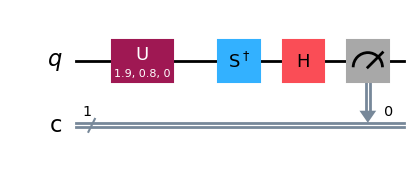

{'1': 16071, '0': 83929}


In [9]:
qc_psi_Qiskit = QuantumCircuit(1,1)
qc_psi_Qiskit.u(theta,phi,0,0)

'añadimos el medidor efectivo segun queramos medir <X>, <Y> o <Z>'
#P = 'Z'
#P = 'X'
P = 'Y'

if P =='X':
    qc_psi_Qiskit.h(0)    

elif P =='Y':
    qc_psi_Qiskit.sdg(0)
    qc_psi_Qiskit.h(0)

qc_psi_Qiskit.measure(0,0)    
display(qc_psi_Qiskit.draw('mpl')) 

nshots = 100000

counts_psi = AerSimulator().run(qc_psi_Qiskit,shots = nshots).result().get_counts()
print(counts_psi)


Ahora,con las frecuencias relativas de los autovalores  de Z, podemos calcular los valores medios


In [10]:
mean_P = 0
for bits, counts  in counts_psi.items():
    mean_P += (-1)**(int(bits))* (counts/nshots)

print('<',P,'>','=',np.round(mean_P,5))


< Y > = 0.67858


Finalmente ya estamos en condiciones de calcular el valor esperado de un observable arbitrario

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
<br>    
genera un observable arbitrario $A$. Obtén los coeficientes $a_i$  y calcula el valor esperado 
    
\begin{eqnarray*}
\langle A\rangle_\psi  = ~a_0 + a_1 \langle X\rangle_\psi + a_2 \langle Y\rangle_\psi + a_3 \langle Z\rangle_\psi
\end{eqnarray*}
</div>

### $\langle A \rangle$ con un sólo circuito**

Podemos escribir la descomposición de $A$ de la siguiente manera

$$
A = a_0 I + |{\bf a}| ~ \hat \bn \cdot \bsig 
$$

donde ${\bf a} = (a_1,a_2,a_3)~$ y $~\hat \bn = {\bf a}/ |{\bf a}|$.
De modo que, ahora 

$$
\langle A \rangle_\psi  = a_0 + |\bf a| \,  \langle \bn \cdot \bsig  \rangle_\psi
$$

Vemos que para calcular $\langle A \rangle_\psi$ es suficiente con conocer los valores $a_i = (a_0,{\bf a})$ y **un sólo circuito** que nos proporcione el valor esperado $\langle \bn \cdot \bsig  \rangle_\psi$. 



La clave de este último punto está en usar el *medidor efectivo* en la dirección $\hat \bn$ 

<br>



<figure><center>
<img src="images/Un_meter.png" align=center width='40%'/>
</center></figure>

<br>

Con la salida de este circuito, el valor esperado es análogo

$$
\langle \bn \cdot \bsig  \rangle_\psi =  + \frac{n_0}{N} - \frac{n_1}{N}
$$

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
   
Escribe una función que calcule el valor esperado de un operador $A$ en un estado $\ket{\psi}$ usando este método. Verifica que es consistente con el método anterior. 
</div>

## Desviación estándar


Dada una variable aleatoria, $(\lambda,p(\lambda))$, la *varianza*  es *el valor medio de la desviación cuadrática en torno a la media*
<br>
<br>
$$
~~\sigma ^2 = \overline{(\lambda-\bar\lambda)^2}
$$


En el caso de que la variable aleatoria  sean los resultados de las medidas de un observable $A$ en un estado cuántico $\ket{\psi}$, la varianza será el valor medio del operador $(A-\langle A\rangle_\psi)^2$, es decir
<br>
<br>
\begin{align}
\sigma(A,\psi)^2 &= \langle  (A - \langle A\rangle_\psi )^2 \rangle_\psi \\  \rule{0mm}{8mm}
&= \bra{\psi} (A - \langle A\rangle_\psi )^2 \ket{\psi} \\ \rule{0mm}{8mm}
&= \bra{\psi} (A^2 - 2 A \langle A\rangle_\psi + \langle A\rangle_\psi^2 ) \ket{\psi} \\  \rule{0mm}{8mm}
& = \bra{\psi}A^2\ket{\psi} - \bra{\psi}A\ket{\psi}^2
\end{align}
<br>

de modo que, llegamos a la siguiente expresión,  para la desviación tipica $\Delta_\psi A = \sigma(A,\psi)$

<div class="alert alert-block alert-info",text-align:center>
<p style="color: navy;">  
<b>Teorema:</b> <i> desviación típica de un observable en un estado</i>
<br>
<br>
$$  \Delta_\psi A =  \sqrt{\bra{\psi}A^2\ket{\psi} - \bra{\psi} A\ket{\psi}^2}
$$
<br>
</div>


Ni la variaza ni la desviación típica son operaciones lineales $\Delta_\psi(A+B) \neq \Delta_\psi A + \Delta_\psi B$.

Por lo tanto, es necesario calcular los valores esperados $\langle A^2\rangle_\psi$ y $\langle A\rangle_\psi^2$ por separado. 

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
<br>
Escribe una función <i>desv_estandar</i>, que reciba como argumentos, un observable $A$ y un estado $\ket{\psi}$ y calcule por simulación cuántica $\Delta_\psi A$. 
</div>

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
<br>
Genera dos observables aleatorios $A$ y $B$. Utilizando la función <i>desv_estandar</i>  verifica la relación de incertidumbre de Heisenberg
<br>
<br>
$$
\Delta_\psi A\, \Delta_\psi B \geq \frac{1}{2} | \langle [A,B]\rangle_\psi |
$$
</div>

## Valor esperado de un operador unitario

Supongamos que sabemos cómo preparar, mediante un circuito, el estado $\ket{\psi}$ a partir del estado $\ket{0}$. 

$$\ket{\psi} = U\ket{0}$$

En este caso, podemos calcular el valor esperado de cualquier operador unitario $V$ de la siguiente forma

$$
\bra{\psi}V\ket{\psi} = \bra{0} U^\dagger V U\ket{0} = \braket{0}{\tilde \psi}
$$

donde $$\ket{\tilde\psi} \equiv U^\dagger V U\ket{0}$$ 

y la acción del operador unitario $U^\dagger V U$ se realiza mediante una composición de circuitos inicializada en $\ket{0}$

 Midiendo $\ket{\tilde \psi}$  en la base $Z$, la fracción relativa de resultados $0\to  n_0/N$ nos da acceso al *módulo del valor esperado*, 
 
$$
\sqrt{ \frac{n_{0}(\tilde\psi)}{N} } ~=~  \sqrt{p_0}  ~=~   | \braket{0}{\tilde \psi}|  ~=~ |\bra{\psi}V\ket{\psi}|   
$$



<div class="alert alert-block alert-info">
<p style="text-align:left ;color: navy;">  
Circuito necesario para medir $\langle V\rangle_{\psi} $ donde $\ket{\psi} = U\ket{0}$ es un estado preparable
<br>
<br>
<div>
<img src="images/vev_unitary_V.png" width="45%" style="margin:auto"/>
</p>
</div>


Si $V$ además de ser <i>unitario</i>, fuese <i>hermítico</i>, entonces tendríamos acceso al valor esperado completo, al tratarse de una cantidad real. 


Operadores de 1 cúbit unitarios y hermíticos son, por ejemplo, los operadores 
$V = X,Y,Z,H$. 
</div>

Este argumento nos permite calcular de otra manera 

$$
\left. 
\begin{array}{c} \langle Z\rangle_\psi \\ \rule{0mm}{8mm} \langle X\rangle_\psi \\ \rule{0mm}{8mm} \langle Y\rangle_\psi \end{array}
\right\} ~=~\braket{0}{\tilde\psi} ~=~ \sqrt{\frac{n_{0}(\tilde\psi)}{N}} ~~~\hbox{con}~~~~
\left\{ 
\begin{array}{l}  \ket{\tilde \psi} = U^\dagger  Z  U\ket{0} \\ \rule{0mm}{8mm} \ket{\tilde \psi} = U^\dagger H Z H U\ket{0}  \\ \rule{0mm}{8mm}  \ket{\tilde \psi} = U^\dagger SH Z HS^\dagger U\ket{0} \end{array}
\right.
$$

Como vemos, ganamos en facilidad de cálculo pero perdemos información acerca del signo de $\langle V\rangle_\psi$

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
Calcula por este procedimiento los valores de  $\langle X\rangle_\psi$, $\langle Y\rangle_\psi$ y $\langle Z\rangle_\psi$ encontrados anteriormente y verificar que obtienes el mismo resultado. 
</div>

In [ ]:
' el operador unitario que genera |psi>  a partir de |0> es U(theta, phi, 0,0)'
qc_psi_U = QuantumCircuit(1,1)
qc_psi_U.u(theta,phi,0,0)


'fijemos el observable a medir'
P = 'Y'

if P =='X':
    qc_psi_U.x(0)
elif P=='Y':
    qc_psi_U.y(0)
elif P=='Z':
    qc_psi_U.z(0)
    
qc_psi_U.u(-theta,-phi,0,0)


qc_psi_U.measure(0,0)

display(qc_psi_U.draw('mpl'))

' ejecutamos '
shots= 100000
counts=AerSimulator().run(qc_psi_U,shots=shots).result().get_counts()

' ahora solo nos interesa la fracción de 0s '
mean_P = np.sqrt(counts['0']/shots)
print('|<',P,'>| =',np.round(mean_P,5))